In [244]:
#Putting all the import packages over here.
import pandas as pd
import re
pd.options.display.max_columns = 30  #Can't have too many columns.
import glob
from datetime import datetime
import dateutil.parser
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= (17,5)
from collections import Counter
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
import langid
from tqdm import tqdm
import os

In [247]:
#Checking if all the speeches are loaded or not
folder = nltk.data.find('A:/Data Analysis Jupyter/Campaign-Analytics/Speeches/narendramodi/2019/')
path_link = 'A:/Data Analysis Jupyter/Campaign-Analytics/Speeches/narendramodi/2019/*'
paths = glob.glob(path_link)
len(paths)

40

In [366]:
nm_speeches = [ ]  #Empty dataframe to store all the content of speeches
for path in paths:
    corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '.*\.txt')
    # opening the files and converting it to a dictionary
    with open(path, encoding="utf-8") as speech_file:
        filename = path.split('/')[-1]
        date = re.search(r"(\d\d)_(\d\d)_(\d\d\d\d)", filename) 
        if date:
            date = datetime.strptime(date.group(0), '%d_%m_%Y')
        else:
            date = np.nan
        speech = {
            'Title' : path.split('/')[-1],
            'Speech' : speech_file.read(),
            'Date' : date
        }   
    nm_speeches.append(speech)
nm_df = pd.DataFrame(nm_speeches)
nm_df.head(10)

,Date,Speech,Title
0,2019-02-01,﻿“This is a major step towards making India a ...,2019\01_02_2019_PM’s address on Budget 2019-20...
1,2019-03-01,﻿Friends.\nI am delighted to be here in Kanyak...,2019\01_03_2019_PM’s address after launch of d...
2,2019-03-02,"﻿Arun Puri, Chairman and Editor-in-Chief of In...",2019\02_03_2019_PM’s address at the India Toda...
3,2019-03-02,﻿Congratulations to all the young colleagues w...,2019\02_03_2019_PM’s opening remarks on the oc...
4,2019-02-03,﻿Before coming here someone told me that there...,2019\03_02_2019_PM’s address at inauguration o...
5,2019-02-07,"﻿Chairman, I have come to thank him on the hon...",2019\07_02_2019_PM’s address at the reply to t...
6,2019-02-09,﻿My dear brothers and sistersThe rising sun sy...,2019\09_02_2019_PM’s address at the inaugurati...
7,2019-02-11,"﻿Ladies and Gentlemen, I was delayed in coming...",2019\11_02_2019_PM's address at third Billiont...
8,2019-02-12,﻿Governor of Haryana Shri Satyadev Narayan Ary...,2019\12_02_2019_PM’s address at the foundation...
9,2019-02-12,"﻿His Excellency, President, Vice President, Sp...",2019\12_02_2019_PM’s address at the unveiling ...


In [368]:
nm_df['Year'],nm_df['Month'],nm_df['Day'] = nm_df.Date.dt.year, nm_df.Date.dt.month, nm_df.Date.dt.day

In [369]:
nm_df.head()

,Date,Speech,Title,Year,Month,Day
0,2019-02-01,﻿“This is a major step towards making India a ...,2019\01_02_2019_PM’s address on Budget 2019-20...,2019,2,1
1,2019-03-01,﻿Friends.\nI am delighted to be here in Kanyak...,2019\01_03_2019_PM’s address after launch of d...,2019,3,1
2,2019-03-02,"﻿Arun Puri, Chairman and Editor-in-Chief of In...",2019\02_03_2019_PM’s address at the India Toda...,2019,3,2
3,2019-03-02,﻿Congratulations to all the young colleagues w...,2019\02_03_2019_PM’s opening remarks on the oc...,2019,3,2
4,2019-02-03,﻿Before coming here someone told me that there...,2019\03_02_2019_PM’s address at inauguration o...,2019,2,3


In [371]:
nm_df = nm_df[["Year","Month", "Day", "Title", "Speech", "Date"]]

In [372]:
nm_df.head()

,Year,Month,Day,Title,Speech,Date
0,2019,2,1,2019\01_02_2019_PM’s address on Budget 2019-20...,﻿“This is a major step towards making India a ...,2019-02-01
1,2019,3,1,2019\01_03_2019_PM’s address after launch of d...,﻿Friends.\nI am delighted to be here in Kanyak...,2019-03-01
2,2019,3,2,2019\02_03_2019_PM’s address at the India Toda...,"﻿Arun Puri, Chairman and Editor-in-Chief of In...",2019-03-02
3,2019,3,2,2019\02_03_2019_PM’s opening remarks on the oc...,﻿Congratulations to all the young colleagues w...,2019-03-02
4,2019,2,3,2019\03_02_2019_PM’s address at inauguration o...,﻿Before coming here someone told me that there...,2019-02-03


In [52]:
nm_df.index = nm_df['date']  #Setting a dateindex
nm_df.head()

,content,date,filename
date,,,
2019-02-01,﻿“This is a major step towards making India a ...,2019-02-01,2019\01_02_2019_PM’s address on Budget 2019-20...
2019-03-01,﻿Friends.\n\nI am delighted to be here in Kany...,2019-03-01,2019\01_03_2019_PM’s address after launch of d...
2019-03-02,"﻿Arun Puri, Chairman and Editor-in-Chief of In...",2019-03-02,2019\02_03_2019_PM’s address at the India Toda...
2019-03-02,﻿Congratulations to all the young colleagues w...,2019-03-02,2019\02_03_2019_PM’s opening remarks on the oc...
2019-02-03,﻿Before coming here someone told me that there...,2019-02-03,2019\03_02_2019_PM’s address at inauguration o...


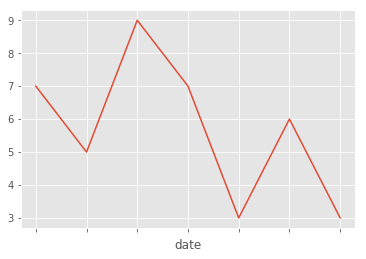

In [60]:
plt.style.use('ggplot')
nm_df.groupby(by=nm_df.index.weekday_name)['filename'].count().plot()

### Word Occurances in his speechs

In [63]:
#Words whose occurances we would want to track
list_of_words = ["freedom", "democracy", "nation", "world", "soil",
    "environment", "oil", "jobs", "education", "employment", "security",
    "terrorism", "pakistan", "china", "u.s", "america", "rape", "rahul",
    "corruption", "black money", "farmers","suicide", "surgical strike"]

In [64]:
#Word Count Function
def get_word_time_trend(x, word):
    text_string = re.sub('', '', x).lower().split()
    c = 0
    for w in text_string:
        if (w == word):
            c += 1
    return c

In [65]:
#Normalize
def normalize(x, y):
    return (1000 * x) / y

In [66]:
df = nm_df.copy()

In [67]:
for word in list_of_words:
    df['t_' + word] = df.content.apply(lambda x: get_word_time_trend(x, word))

In [68]:
df2 = df[df.index.isnull() == False]

In [72]:
nm_fdist = nltk.FreqDist(nm_df)

In [73]:
len(nm_fdist)

3

In [74]:
nm_fdist.most_common()

[('content', 1), ('date', 1), ('filename', 1)]